# Predictive Accuracy and Dataset Size:
Show predictive accuracy of an estimator on differently-sized subsets of a synthetic dataset.

In [183]:
# Setup
import numpy as np
import pandas as pd
from pandas import DataFrame as DF,Series as Ser
from matplotlib import pyplot as plt
import math

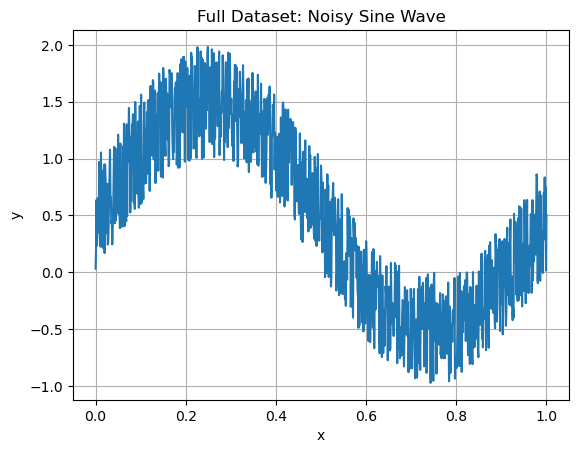

In [184]:
# Create, plot the dataset
rng = np.random.default_rng()

def noisy_sine(X):
#    return [(math.sin(2 * math.pi * x) + \
#        0.5 * rng.random()) for x in X] # This wasn't noisy enough!
    return [(math.sin(2 * math.pi * x) + rng.random()) for x in X]

y_all = noisy_sine(X_all)
plt.plot(X_all, y_all)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Full Dataset: Noisy Sine Wave")
plt.show()

In [185]:
# Create an estimator: SplineTransformer/LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

spline_component = SplineTransformer(n_knots=3, degree=2)
LR_component = LinearRegression()

model = make_pipeline(spline_component, LR_component)

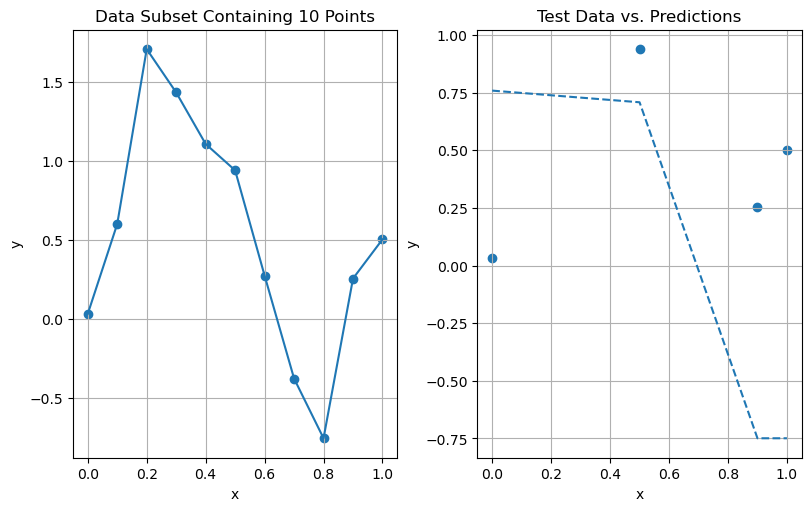

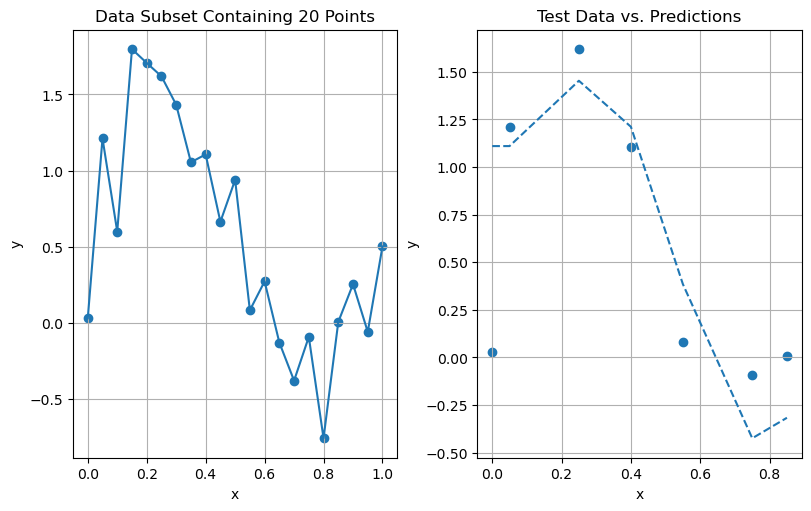

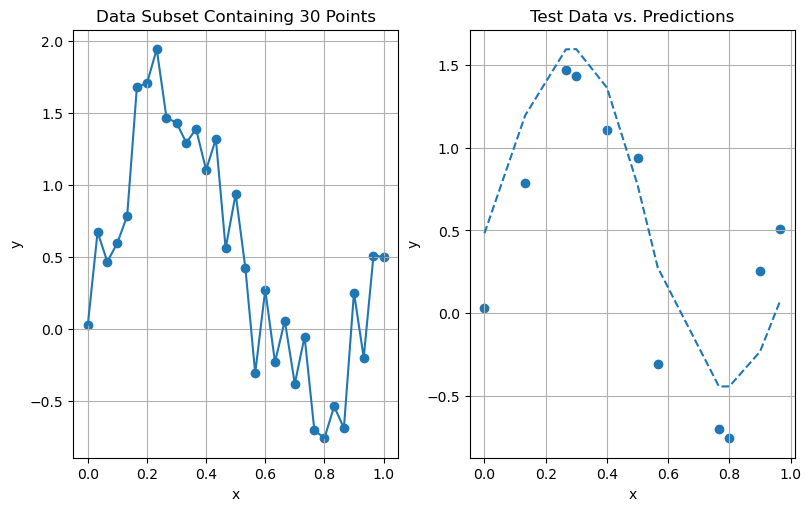

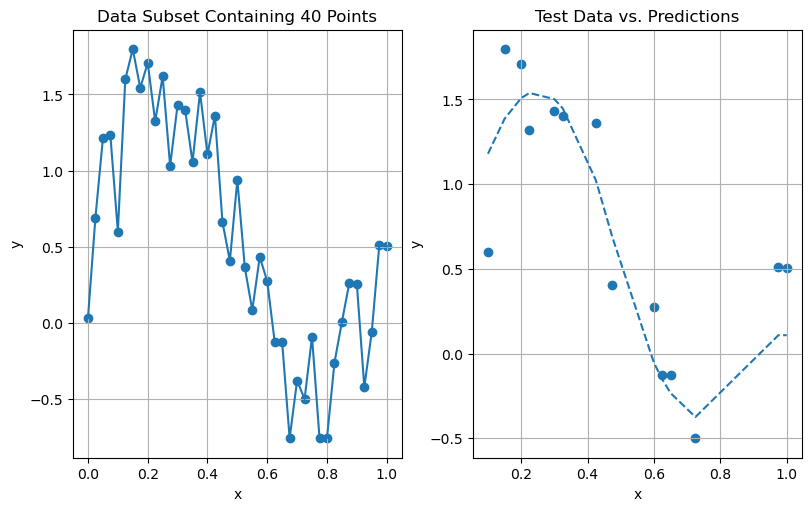

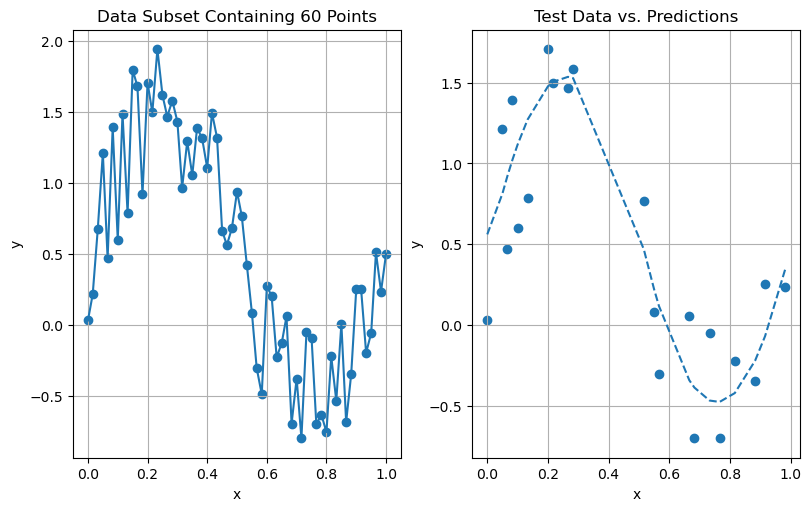

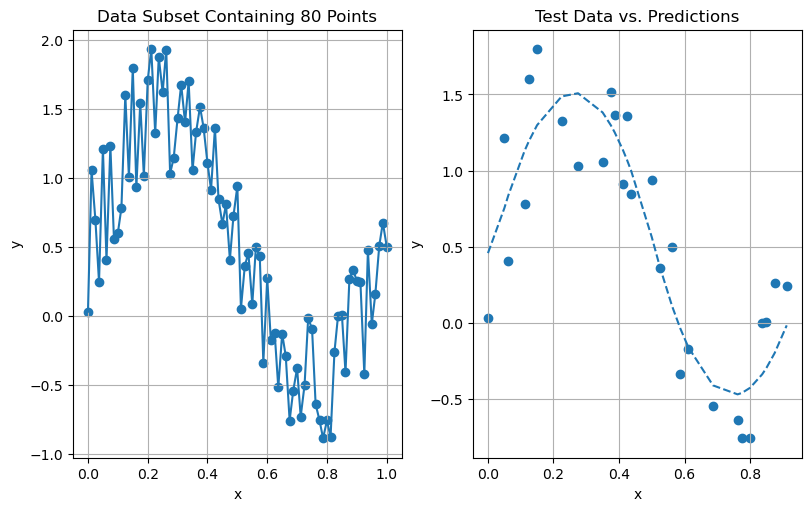

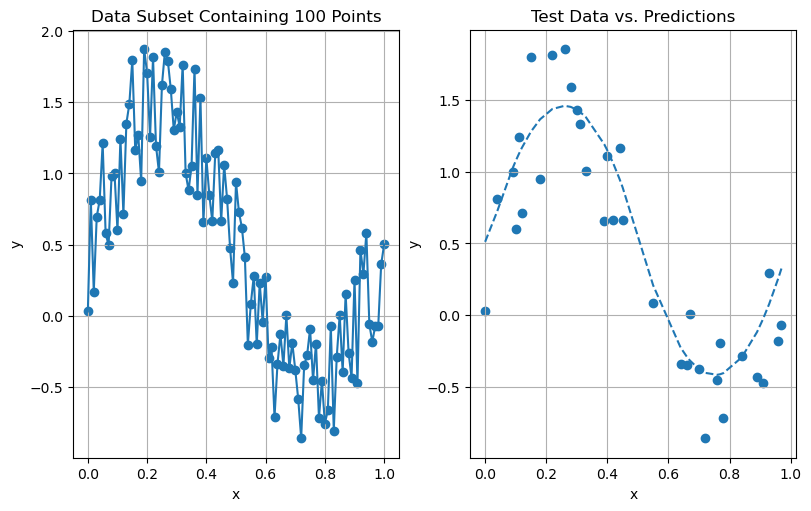

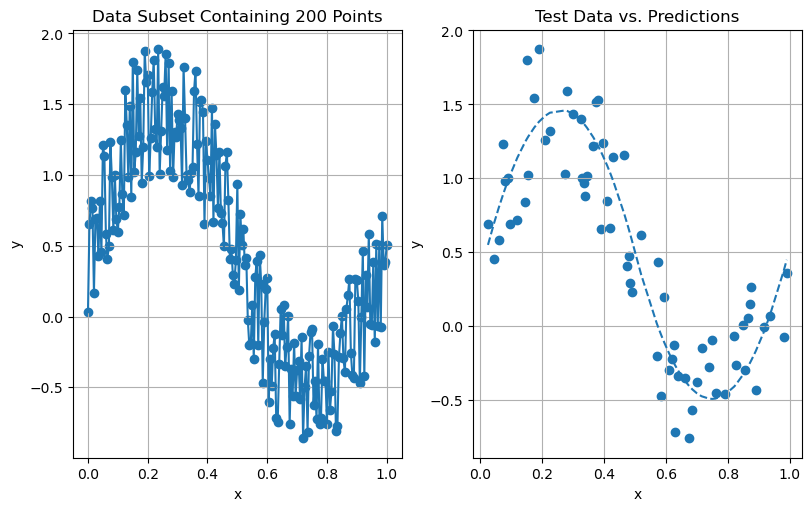

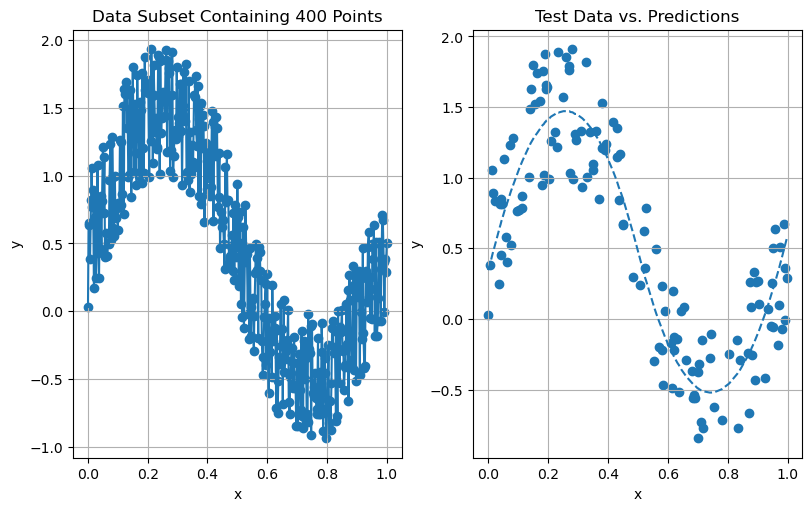

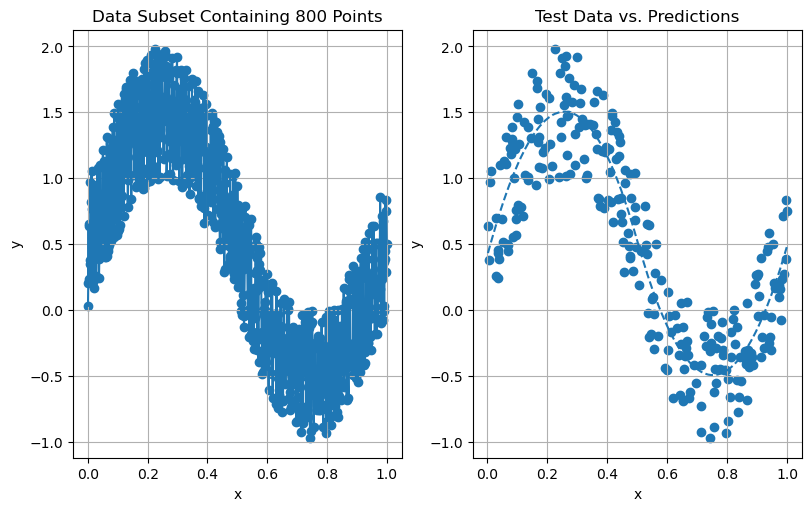

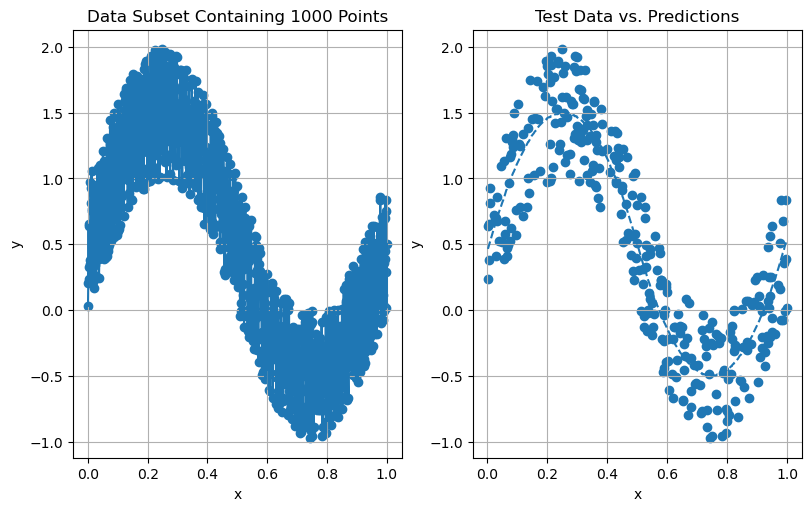

In [189]:
# Choose one or more moderate-size subset(s) of the dataset
from sklearn.model_selection import train_test_split

def make_data_subset(selec_sizes):
    selector = np.linspace(0, len(X_all)-1, selec_sizes+1).astype(int)
    X = [X_all[n] for n in selector]
    y = [y_all[n] for n in selector]
    return X, y

selec_sizes = [10, 20, 30, 40, 60, 80, 
               100, 200, 400, 800, 1000]
accuracies = []
for s in selec_sizes:
    # Make the subset
    X, y = make_data_subset(s)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
    
    # X_train, X_test need to be sorted; 
    Xy_train = pd.concat([Ser(X_train), Ser(y_train)], axis=1)
    Xy_train.columns = ['X', 'y']
    Xy_train.sort_values('X', inplace=True)
    
    Xy_test = pd.concat([Ser(X_test), Ser(y_test)], axis=1)
    Xy_test.columns = ['X', 'y']
    Xy_test.sort_values('X', inplace=True)

    # Calculate accuracy for each subset with retuning for each sample size
    model.fit(DF(Xy_train['X']), Xy_train['y'])
    predictions = model.predict(DF(Xy_test['X']))
    
    accuracy = model.score(DF(Xy_test['X']), Xy_test['y'])
    accuracies.append(accuracy)
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout='constrained')
    ax[0].plot(X, y)
    ax[0].scatter(X, y)
    ax[0].grid()
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title("Data Subset Containing " + str(s) + " Points")

    ax[1].scatter(Xy_test['X'], Xy_test['y'])
    ax[1].plot(Xy_test['X'], predictions, '--')
    ax[1].grid()
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title("Test Data vs. Predictions")
    plt.show()

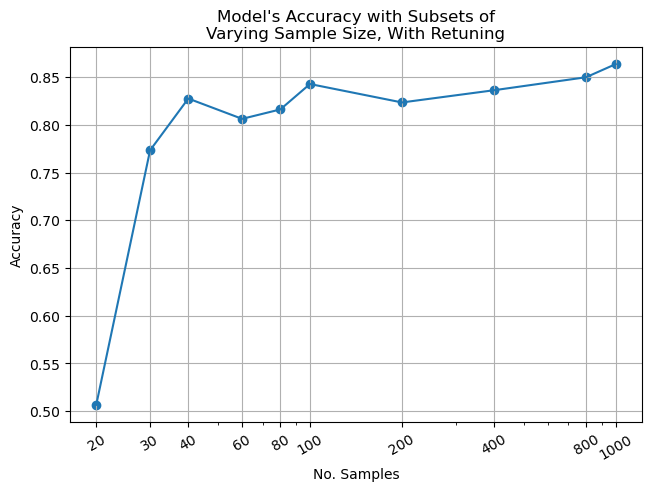

In [190]:
# Plot the accuracy of the model on each of the subsets
# (accuracy for subset of 10 samles was dropped because
# it was negative, distorted the Y-axis too much)

fig, ax = plt.subplots(layout='constrained')
ax.set_xscale('log')
ax.grid()
ax.plot(selec_sizes[1:], accuracies[1:])
ax.scatter(selec_sizes[1:], accuracies[1:])
ax.set_xticks(ticks=selec_sizes[1:], labels=selec_sizes[1:],
             rotation=30)
ax.set_xlabel("No. Samples")
ax.set_ylabel("Accuracy")
ax.set_title("Model's Accuracy with Subsets of\n"
              "Varying Sample Size, With Retuning")
plt.show()